# Running TFLite Models

## Setup

In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.15.0


## Create a Basic Model of the Form **y = mx + x**

In [3]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-1, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 4.8602
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 3.9199
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 3.1796
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 2.5965
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 2.1372
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 1.7753
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 1.4901
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 1.2651
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 1.0876
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 0.9475
Epoch 11/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8367
Epoch 12/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7491
Epoch 13/200
1/1 [==============================] - 0s

## Generate a SavedModel

In [4]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

## Convert the SavedModel to TFLite

In [5]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

1080

## Initialize the TFLite Interpreter to Try it Out

In [8]:
# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [9]:
# Test the TensorFlow Lite model on random input data
input_shape = input_details[0]['shape']
inputs, outputs = [], []

for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])


## Visualize the Model

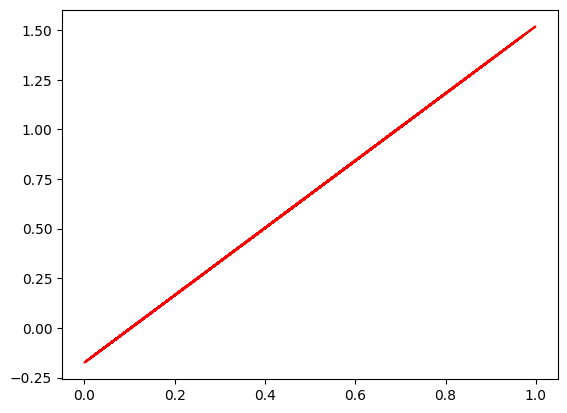

In [10]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

In [11]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>